# Descriptive statistics exercises

This notebook contains all solutions of the exercises from [Section 1.3 Descriptive Statistics](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in the **No Bullshit Guide to Statistics**.

### Notebooks setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

In [3]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

### Load the `sdudents` dataset

In [4]:
import os
if os.path.exists("../datasets/students.csv"):
    data_file = open("../datasets/students.csv", "r")
else:
    import io
    data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

students = pd.read_csv(data_file)

### Let's look at the `effort` variable:

In [5]:
efforts = students["effort"]
# efforts

#### E1.1
Compute the Mean, Min, Max, and Range of the effort variable in the students dataset.




In [6]:
efforts = students["effort"]
efforts.mean(), efforts.min(), efforts.max()

(8.904666666666666, 5.21, 12.0)

#### E1.2
Find Q1, Med, and Q3 of the effort variable in the students dataset.


In [7]:
efforts.quantile(q=0.25), efforts.median(), efforts.quantile(q=0.75)

(7.76, 8.69, 10.350000000000001)

#### E1.3
Make a one-way frequency table for the effort variable. Use (5,7], (7,9], (9,11], (11,13] as the boundaries of the bins.

In [8]:
bins = [5, 7, 9, 11, 13]
efforts.value_counts(bins=bins).sort_index()

(4.999, 7.0]    2
(7.0, 9.0]      6
(9.0, 11.0]     5
(11.0, 13.0]    2
Name: effort, dtype: int64

In [9]:
# # ALT. to get [5,7), [7,9), [9,11), [11,13) instead, use
# bins2 = pd.IntervalIndex.from_breaks(bins, closed="left")
# efforts.value_counts(bins=bins2).sort_index()

#### E1.4
Draw a scatter plot for the following dataset of (x,y) pairs:
\{ (2,2), (3,3), (4,3), (5,5), (6,4) \}.

<Axes: xlabel='x', ylabel='y'>

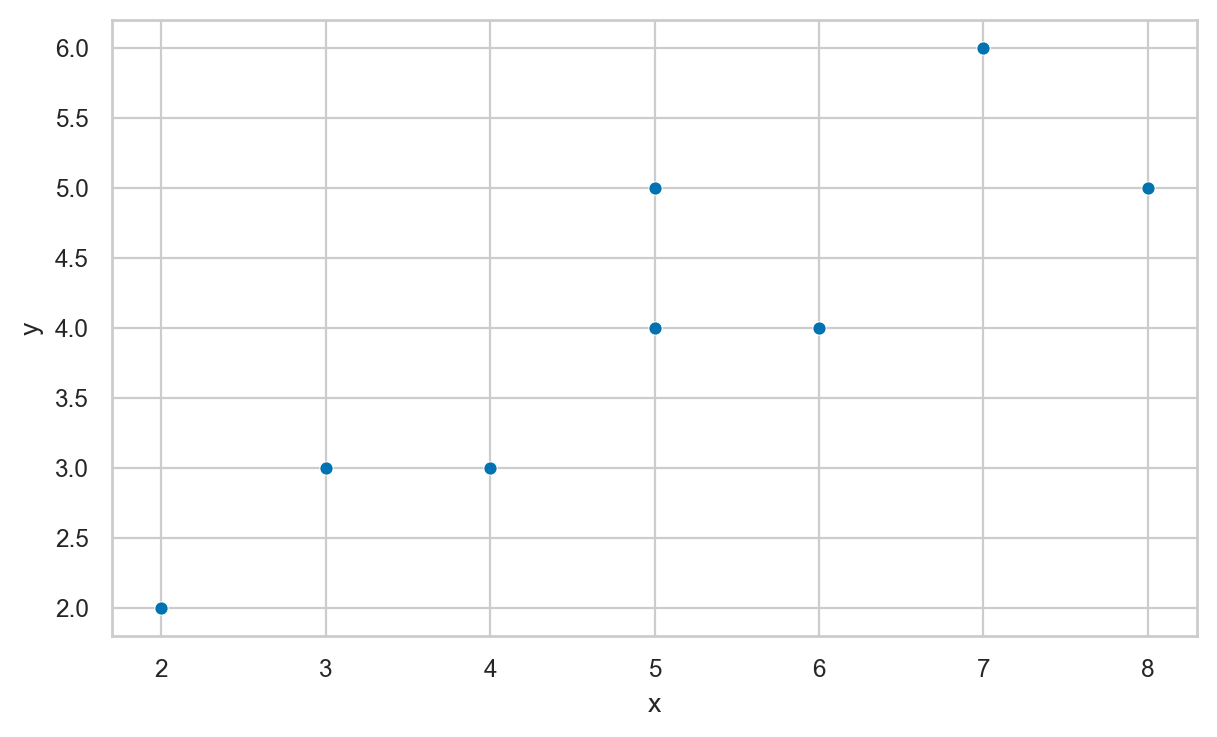

In [10]:
df = pd.DataFrame([(2,2), (3,3), (4,3), (5,5),
                   (6,4), (5,4), (7,6), (8,5)],
                  columns=["x", "y"])
sns.scatterplot(x="x", y="y", data=df)

#### E1.5
Make a bar chart displaying the frequencies of the curriculum variable.


<Axes: xlabel='curriculum', ylabel='count'>

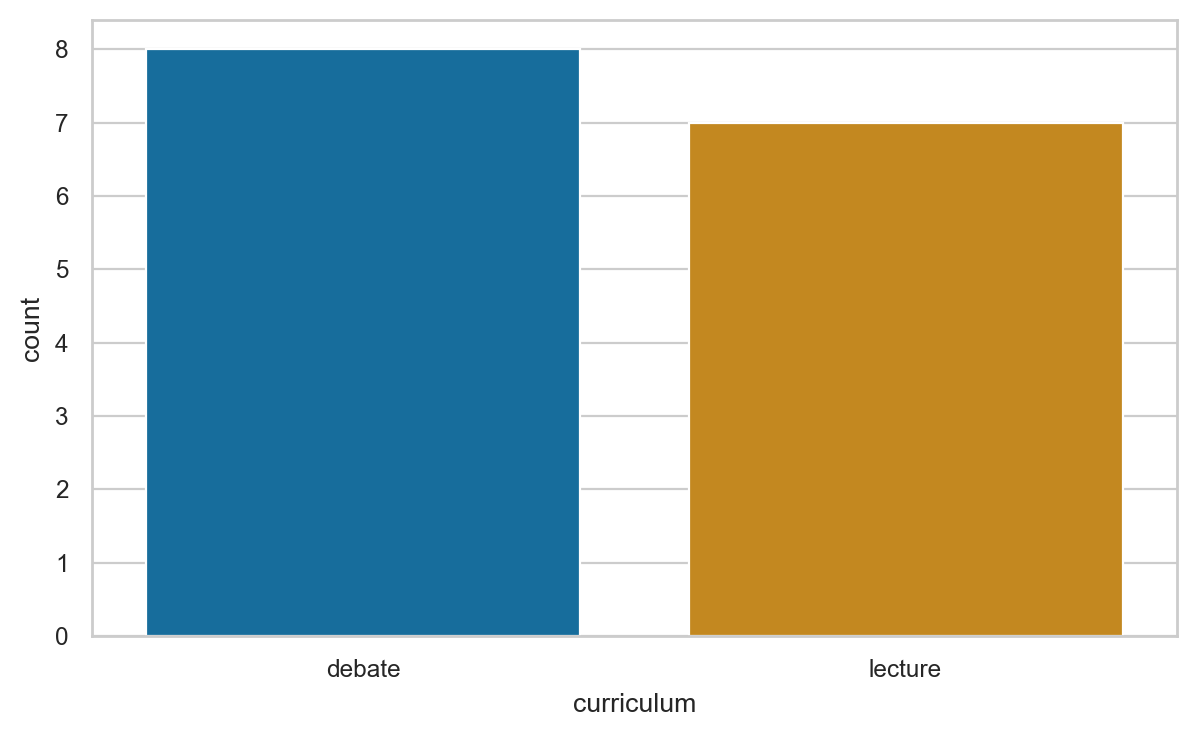

In [11]:
sns.countplot(data=students, x="curriculum")

#### E1.6
Compute frequencies and relative frequencies for the curriculum variable. Display the results in a one-way table.

In [12]:
students["curriculum"].value_counts()

debate     8
lecture    7
Name: curriculum, dtype: int64

In [13]:
students["curriculum"].value_counts(normalize=True)

debate     0.53
lecture    0.47
Name: curriculum, dtype: float64

#### E1.7
What is the mode for curriculum?

In [14]:
mode = students["curriculum"].describe()['top']
mode_freq = students["curriculum"].describe()['freq']

print("The mode is", mode, "with frequency", mode_freq)

The mode is debate with frequency 8
